## 2023 New Orleans 911 Safety and Crime Calls - Cleaning, Transforming, and Visualizing

### Project Overview
The primary objective of this project is to conduct a comprehensive analysis and visualization of incident data reported to the Orleans Parish Communication District (OPCD) for the year 2023. The insights generated from this analysis have the potential to significantly impact decision-making processes related to resource allocation for the New Orleans Police Department (NOPD) and other relevant stakeholders. The project aims to improve public safety and enhance the overall effectiveness of law enforcement operations. Furthermore, it aspires to foster transparency and accountability in resource allocation practices.

#### 1. Data Cleaning: 

a. Import necessary libraries.  
b. Load dataset into notebook using pandas.  
c. Create Latitude/Longitude columns from 'Location' column using replace(), strip(), split().  
d. Observe record categorization columns (ie. InitialTypeText), drop null values.  

#### 2. Data Transformation: 

a. Create a new categorization column for broader analysis of response time correlation using the InitialTypeText column.   
b. Drop values of InitialTypeText with < 70 records and other incident type records that can be deemed irrelevant for the purposes of this project (ie. routine tests).   
c. Observe class distributions of InitialTypeText, Zip Code, Disposition Text, and Police District.  
d. Data Type Checkpoint - convert columns to appropriate data types keeping feature engineering in mind.  
    2d.1 Convert Police District to an object, as it defines a categorical region, and is not used as an integer.  
    2d.2 Drop records where Lat/Long did not convert from the original "Location" column properly.  
e. Create four new features that calculate response times in the format of hours (float).    
    2e.1 Dispatch Response Time = TimeDispatch - TimeCreate    
    2e.2 Scene Arrival Response Time = TimeArrive - TimeDispatch    
    2e.3 Time Arrive to Time Closed = TimeClosed - TimeArrive     
    2e.4 Time Create to Arrival Time = TimeArrive - TimeCreate    
f. Tranform these date/time difference results to units of hours.
    



#### 3. Exploratory Data Analysis:

a. Observe the spread of calculated response time measures.

TBC. **Temporal Trend Analysis**: Analyze trends over time to identify patterns in incident types, priorities, and frequencies. This could help in understanding peak times for certain types of incidents and planning resources accordingly.   
TBC. **Response Time Analysis**: Evaluate the response times (InitialCalltoDispatchTime, DispatchToArriveTime, ArrivaltoClose, ActualResponseTime) to identify areas or times where response times are higher than average and investigate potential causes. 
Final Target Variable: InitialCalltoDispatchTime


### Dataset Source
https://catalog.data.gov/dataset/calls-for-service-2023




### 1a. Import necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### 1b. Load dataset into noteboook. 

In [2]:
df = pd.read_csv("Calls_for_Service_2023.csv")

In [3]:
df.describe()

,MapX,MapY,Zip,PoliceDistrict
count,3.250910e+05,3.250910e+05,320441.000000,325091.000000
mean,4.702786e+06,6.274584e+05,70121.020054,4.496227
std,5.808756e+06,5.140406e+05,5.968440,2.362977
min,0.000000e+00,-8.230500e+04,70112.000000,0.000000
25%,3.673647e+06,5.290830e+05,70116.000000,3.000000
50%,3.681536e+06,5.358760e+05,70119.000000,4.000000
75%,3.694577e+06,5.492190e+05,70126.000000,7.000000
max,3.736900e+07,3.513814e+06,70148.000000,8.000000


In [4]:
df.head(50)

,NOPD_Item,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,...,TimeArrive,TimeClosed,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
0,A0599223,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,3662781,517589,01/06/2023 04:55:53 PM,...,01/06/2023 06:28:28 PM,01/06/2023 07:15:31 PM,RTF,REPORT TO FOLLOW,N,2A02,002XX Henry Clay Av,70118.0,2,POINT (-90.12764112 29.91774739)
1,B0272423,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,3687848,536417,02/03/2023 05:30:36 PM,...,02/03/2023 06:16:17 PM,02/03/2023 06:27:44 PM,GOA,GONE ON ARRIVAL,N,5C02,028XX St Claude Av,70117.0,5,POINT (-90.04784966 29.96876737)
2,A0653023,THEFT,THEFT,2,BURGV,BURGLARY FROM VEHICLE,0,3706231,564651,01/07/2023 07:05:08 AM,...,NaN,01/07/2023 10:21:05 AM,RTF,REPORT TO FOLLOW,N,7P04,080XX Trapier Av,70127.0,7,POINT (-89.98874997 30.04582091)
3,A0700123,MENTAL,EMOTIONALLY DISTURBED PERSON,1,MENTAL,EMOTIONALLY DISTURBED PERSON,2,37369000,3513814,01/07/2023 05:15:17 PM,...,NaN,01/09/2023 11:22:24 AM,GOA,GONE ON ARRIVAL,N,7P03,070XX Bundy Rd,NaN,0,POINT (0 0)
4,B0287723,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,3716994,556349,02/03/2023 08:21:39 PM,...,02/05/2023 04:31:36 AM,02/05/2023 05:35:19 AM,GOA,GONE ON ARRIVAL,N,7J04,112XX King Richard Dr,70128.0,7,POINT (-89.95505013 30.02264209)
5,B0302923,THEFT,THEFT,1,THEFT,THEFT,0,3706432,560458,02/03/2023 11:48:51 PM,...,02/05/2023 09:31:31 AM,02/05/2023 09:36:10 AM,GOA,GONE ON ARRIVAL,N,7O10,069XX Boston Dr,70127.0,7,POINT (-89.98826971 30.03428392)
6,A0650123,PRIS,PRISONER TRANSPORT,1,PRIS,PRISONER TRANSPORT,1,3692978,529549,01/07/2023 06:08:31 AM,...,01/08/2023 01:23:23 AM,01/08/2023 02:56:18 AM,NAT,Necessary Action Taken,N,4H02,024XX Sanctuary Dr,70114.0,4,POINT (-90.03189701 29.94972492)
7,A0650423,PRIS,PRISONER TRANSPORT,1,PRIS,PRISONER TRANSPORT,1,3692978,529549,01/07/2023 06:09:51 AM,...,01/08/2023 02:56:25 AM,01/08/2023 04:58:58 AM,NAT,Necessary Action Taken,N,4H02,024XX Sanctuary Dr,70114.0,4,POINT (-90.03189701 29.94972492)
8,A0651923,DOMDIS,DOMESTIC DISPUTE,1,DOMDIS,DOMESTIC DISPUTE,1,3720484,574597,01/07/2023 06:40:11 AM,...,01/08/2023 12:54:59 PM,01/08/2023 01:13:16 PM,GOA,GONE ON ARRIVAL,N,7K04,078XX Star St,70128.0,7,POINT (-89.9433239 30.07270034)
9,A0655323,DESTR,DESTRUCTION OF PROPERTY,1,DESTR,DESTRUCTION OF PROPERTY,1,3682489,537159,01/07/2023 07:52:58 AM,...,01/08/2023 05:24:50 AM,01/08/2023 06:03:07 AM,GOA,GONE ON ARRIVAL,N,1A01,014XX St Bernard Av,70116.0,1,POINT (-90.06474976 29.97097356)


### 1c. Creating Latitude / Longitude Columns
#### 1c.1. Remove POINT and () from Location column values

In [5]:
df['Location'] = df['Location'].str.replace(r'^POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)$', r'\1 \2', regex=True)

In [6]:
df.head()

,NOPD_Item,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,...,TimeArrive,TimeClosed,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
0,A0599223,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,3662781,517589,01/06/2023 04:55:53 PM,...,01/06/2023 06:28:28 PM,01/06/2023 07:15:31 PM,RTF,REPORT TO FOLLOW,N,2A02,002XX Henry Clay Av,70118.0,2,-90.12764112 29.91774739
1,B0272423,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,3687848,536417,02/03/2023 05:30:36 PM,...,02/03/2023 06:16:17 PM,02/03/2023 06:27:44 PM,GOA,GONE ON ARRIVAL,N,5C02,028XX St Claude Av,70117.0,5,-90.04784966 29.96876737
2,A0653023,THEFT,THEFT,2,BURGV,BURGLARY FROM VEHICLE,0,3706231,564651,01/07/2023 07:05:08 AM,...,NaN,01/07/2023 10:21:05 AM,RTF,REPORT TO FOLLOW,N,7P04,080XX Trapier Av,70127.0,7,-89.98874997 30.04582091
3,A0700123,MENTAL,EMOTIONALLY DISTURBED PERSON,1,MENTAL,EMOTIONALLY DISTURBED PERSON,2,37369000,3513814,01/07/2023 05:15:17 PM,...,NaN,01/09/2023 11:22:24 AM,GOA,GONE ON ARRIVAL,N,7P03,070XX Bundy Rd,NaN,0,POINT (0 0)
4,B0287723,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,3716994,556349,02/03/2023 08:21:39 PM,...,02/05/2023 04:31:36 AM,02/05/2023 05:35:19 AM,GOA,GONE ON ARRIVAL,N,7J04,112XX King Richard Dr,70128.0,7,-89.95505013 30.02264209


#### 1c.2 Split Location column coordinate values into Latitude and Longitude columns for future data visualization use. 

In [7]:
# Ensure 'Location' column strings are stripped of extra whitespace
df['Location'] = df['Location'].str.strip()

# Split the 'Location' column into two new columns: 'Latitude' and 'Longitude'
df[['Latitude', 'Longitude']] = df['Location'].str.split(' ', n=1, expand=True)

In [8]:
df.head()

,NOPD_Item,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,...,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,Latitude,Longitude
0,A0599223,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,3662781,517589,01/06/2023 04:55:53 PM,...,RTF,REPORT TO FOLLOW,N,2A02,002XX Henry Clay Av,70118.0,2,-90.12764112 29.91774739,-90.12764112,29.91774739
1,B0272423,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,3687848,536417,02/03/2023 05:30:36 PM,...,GOA,GONE ON ARRIVAL,N,5C02,028XX St Claude Av,70117.0,5,-90.04784966 29.96876737,-90.04784966,29.96876737
2,A0653023,THEFT,THEFT,2,BURGV,BURGLARY FROM VEHICLE,0,3706231,564651,01/07/2023 07:05:08 AM,...,RTF,REPORT TO FOLLOW,N,7P04,080XX Trapier Av,70127.0,7,-89.98874997 30.04582091,-89.98874997,30.04582091
3,A0700123,MENTAL,EMOTIONALLY DISTURBED PERSON,1,MENTAL,EMOTIONALLY DISTURBED PERSON,2,37369000,3513814,01/07/2023 05:15:17 PM,...,GOA,GONE ON ARRIVAL,N,7P03,070XX Bundy Rd,NaN,0,POINT (0 0),POINT,(0 0)
4,B0287723,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,3716994,556349,02/03/2023 08:21:39 PM,...,GOA,GONE ON ARRIVAL,N,7J04,112XX King Richard Dr,70128.0,7,-89.95505013 30.02264209,-89.95505013,30.02264209


## 1d. Get an overall picture of the dataset.

### 1d.1 Use .info() for a summary of non-null value counts.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325091 entries, 0 to 325090
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NOPD_Item        325091 non-null  object 
 1   Type             325091 non-null  object 
 2   TypeText         325091 non-null  object 
 3   Priority         325091 non-null  object 
 4   InitialType      325091 non-null  object 
 5   InitialTypeText  325091 non-null  object 
 6   InitialPriority  325091 non-null  object 
 7   MapX             325091 non-null  int64  
 8   MapY             325091 non-null  int64  
 9   TimeCreate       325091 non-null  object 
 10  TimeDispatch     157279 non-null  object 
 11  TimeArrive       262397 non-null  object 
 12  TimeClosed       325091 non-null  object 
 13  Disposition      325082 non-null  object 
 14  DispositionText  325082 non-null  object 
 15  SelfInitiated    325091 non-null  object 
 16  Beat             323521 non-null  obje

### 1d.2. Count the number of missing values in each column and sort them. 

In [10]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
TimeDispatch,167812,51.620008
TimeArrive,62694,19.285062
Zip,4650,1.430369
Beat,1570,0.482942
DispositionText,9,0.002768
Disposition,9,0.002768
BLOCK_ADDRESS,1,0.000308
TimeClosed,0,0.000000
Latitude,0,0.000000
Location,0,0.000000


### 1d.3. Drop null values in the "TimeDispatch" column, as response time is our measure of interest for this project (to be calculated for each record later on).

In [11]:
df.dropna(subset=['TimeDispatch'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157279 entries, 0 to 325090
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NOPD_Item        157279 non-null  object 
 1   Type             157279 non-null  object 
 2   TypeText         157279 non-null  object 
 3   Priority         157279 non-null  object 
 4   InitialType      157279 non-null  object 
 5   InitialTypeText  157279 non-null  object 
 6   InitialPriority  157279 non-null  object 
 7   MapX             157279 non-null  int64  
 8   MapY             157279 non-null  int64  
 9   TimeCreate       157279 non-null  object 
 10  TimeDispatch     157279 non-null  object 
 11  TimeArrive       135923 non-null  object 
 12  TimeClosed       157279 non-null  object 
 13  Disposition      157277 non-null  object 
 14  DispositionText  157277 non-null  object 
 15  SelfInitiated    157279 non-null  object 
 16  Beat             157190 non-null  object 
 

### 1d.4. Remove columns that are irrelevant for the purposes of this project.

In [13]:
df.head()

,NOPD_Item,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,...,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,Latitude,Longitude
0,A0599223,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,3662781,517589,01/06/2023 04:55:53 PM,...,RTF,REPORT TO FOLLOW,N,2A02,002XX Henry Clay Av,70118.0,2,-90.12764112 29.91774739,-90.12764112,29.91774739
1,B0272423,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,3687848,536417,02/03/2023 05:30:36 PM,...,GOA,GONE ON ARRIVAL,N,5C02,028XX St Claude Av,70117.0,5,-90.04784966 29.96876737,-90.04784966,29.96876737
3,A0700123,MENTAL,EMOTIONALLY DISTURBED PERSON,1,MENTAL,EMOTIONALLY DISTURBED PERSON,2,37369000,3513814,01/07/2023 05:15:17 PM,...,GOA,GONE ON ARRIVAL,N,7P03,070XX Bundy Rd,NaN,0,POINT (0 0),POINT,(0 0)
4,B0287723,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,3716994,556349,02/03/2023 08:21:39 PM,...,GOA,GONE ON ARRIVAL,N,7J04,112XX King Richard Dr,70128.0,7,-89.95505013 30.02264209,-89.95505013,30.02264209
5,B0302923,THEFT,THEFT,1,THEFT,THEFT,0,3706432,560458,02/03/2023 11:48:51 PM,...,GOA,GONE ON ARRIVAL,N,7O10,069XX Boston Dr,70127.0,7,-89.98826971 30.03428392,-89.98826971,30.03428392


In [14]:
# drop address, MapX, MapY, Location, NOPD_Item, and Disposition.
df = df.drop(["BLOCK_ADDRESS", "MapX", "MapY", "Location", "Disposition", "NOPD_Item"], axis=1)

In [15]:
df.head()

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,Beat,Zip,PoliceDistrict,Latitude,Longitude
0,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,01/06/2023 04:55:53 PM,01/06/2023 05:02:01 PM,01/06/2023 06:28:28 PM,01/06/2023 07:15:31 PM,REPORT TO FOLLOW,N,2A02,70118.0,2,-90.12764112,29.91774739
1,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,02/03/2023 05:30:36 PM,02/03/2023 06:09:35 PM,02/03/2023 06:16:17 PM,02/03/2023 06:27:44 PM,GONE ON ARRIVAL,N,5C02,70117.0,5,-90.04784966,29.96876737
3,MENTAL,EMOTIONALLY DISTURBED PERSON,1,MENTAL,EMOTIONALLY DISTURBED PERSON,2,01/07/2023 05:15:17 PM,01/09/2023 10:49:50 AM,NaN,01/09/2023 11:22:24 AM,GONE ON ARRIVAL,N,7P03,NaN,0,POINT,(0 0)
4,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,02/03/2023 08:21:39 PM,02/04/2023 09:37:33 AM,02/05/2023 04:31:36 AM,02/05/2023 05:35:19 AM,GONE ON ARRIVAL,N,7J04,70128.0,7,-89.95505013,30.02264209
5,THEFT,THEFT,1,THEFT,THEFT,0,02/03/2023 11:48:51 PM,02/05/2023 09:01:59 AM,02/05/2023 09:31:31 AM,02/05/2023 09:36:10 AM,GONE ON ARRIVAL,N,7O10,70127.0,7,-89.98826971,30.03428392


### 2a. Create a broader incident category feature. 
#### 2a.1 Inspect 'Type' vs. 'InitialTypeText' to determine which is more viable to create a new feature 'IncidentCategory'
This will serve as a more interpretable feature for broader stroke categorization of incidents.

In [16]:
df.Type.unique()

array(['SEXOFF', 'TRESP', 'MENTAL', 'WELFARE', 'THEFT', 'PRIS', 'DOMDIS',
       'DESTR', 'VEHSTO', 'DISORD', 'PROP', 'ACCH', 'BURGV', 'DOMVIO',
       'SUSPE', 'MISC', 'ALRMRB', 'ABVEH', 'ACCIHP', 'STFIRED', 'PSERVP',
       'INVP', 'VEHREC', 'PROTEST', 'WEAPON', 'ASLT', 'TRAFHZ', 'SUSPP',
       'ACC', 'ALRMCB', '21', 'NOISE', 'MURDERST', 'STALK', 'TRAF',
       'HOMEIV', 'ASLTWP', 'FIGHT', 'CIT', 'CRIMIS', '24', 'BURGR',
       'ROBCJ', 'THREAT', 'BURGC', 'DEADP', 'ROB', '103D', 'SUSPV',
       'FRAUD', 'URGENT', '95G', 'SUIT', 'PARTY', 'ACCIP', 'SHOTP',
       'TRAFDM', 'RAPE', 'STABP', 'PHONE', '56', 'DRUG', '29', 'ACCFX',
       'ABUSE', 'PROTECT', 'MURDER', 'FRWORK', 'DWI', '94', 'ALRMRH',
       'ACCIMP', 'DIRECTP', 'UNK', 'ALRMCH', '35', 'TSNP', 'MISS', 'ROBW',
       'DEADPU', 'ABDUCT', 'WARRA', 'NOPD', '67C', 'VEHSTRC', 'ALRM',
       'ALRMBB', 'LOCKP', '67AR', '911', 'CIVIL', 'ODP', '94F', 'AREACK',
       'BUSCK', '21P', '67A', 'SEXKIT', 'ACCIVP', '62B', '63', 'SUIAP',
   

In [17]:
df.InitialTypeText.value_counts()

InitialTypeText
MISCELLANEOUS COMPLAINT                   11941
DISORDERLY CONDUCT                        10173
ACCIDENT - PROPERTY DAMAGE                 9078
ALARM: COMMERCIAL - BURGLARY               6902
DOMESTIC DISPUTE                           6651
                                          ...  
ACCIDENT W/INJ - POSSIBLY TRAPPED (PD)        1
ILLEGAL EVICTION                              1
RECLASS: MURDER                               1
HOMELESS                                      1
FIRE UNIT NEEDS ASSISTANCE                    1
Name: count, Length: 220, dtype: int64

In [18]:
df.InitialTypeText.unique()

array(['SIMPLE ASSAULT', 'TRESPASSING', 'EMOTIONALLY DISTURBED PERSON',
       'WELFARE CHECK', 'THEFT', 'PRISONER TRANSPORT', 'DOMESTIC DISPUTE',
       'DESTRUCTION OF PROPERTY', 'BURGLARY FROM VEHICLE',
       'DISORDERLY CONDUCT', 'ACCIDENT - HIT & RUN',
       'MENTAL PERSON: NON VIOLENT', 'DOMESTIC VIOLENCE',
       'SUSPICIOUS EVENT', 'VEHICLE STOLEN', 'MISCELLANEOUS COMPLAINT',
       'THREATS/HARASSMENT', 'ALARM: RESIDENTIAL - BURGLARY',
       'RESIDENTAL BURGLARY (NOT OCCUPIED AT TIME OF INCIDENT)',
       'ABANDONED VEHICLE', 'ACCIDENT W/INJ - HIT & RUN (PD)',
       'SHOTS FIRED', 'ACCIDENT - PROPERTY DAMAGE', 'VEHICLE RECOVERY',
       'INCIDENT REQUESTED BY ANOTHER AGENCY', 'WEAPON BRANDISH/CONCEAL',
       'HAZARD IN ROADWAY', 'SUSPICIOUS PERSON',
       'ALARM: COMMERCIAL - BURGLARY', 'COMPLAINT OTHER',
       'NOISE VIOLATION', 'STALKING INCIDENT',
       'INVESTIGATION: POLICE DEPARTMENT', 'TEST EVENT POLICE',
       'TRAFFIC COMPLAINT/VIOLATION', 'ASSAULT W/WEAPON (

#### 2a.2 InitialTypeText is the best column for grouping values into categories for later correlation analysis with response time, as its values are most interpretable.
There are 157 unique InitialTypeText items. Categories were derived considering class balance, the overarching theme of the incident, and 

Here is how they will be grouped: 

### 2a.3 Create a new column named "Incident Category" and assign each record an Incident Category based on the groupings above.

In [19]:
def check_condition(row):
    incident = row['InitialTypeText']
    if incident in ['SIMPLE ASSAULT',
'ASSAULT W/WEAPON (PD)',
'ASSAULT W/WEAPON - SHOOTING (PD)',
'ASSAULT W/WEAPON - STABBING (PD)',
'AGGRAVATED BATTERY BY SHOOTING',
'AGGRAVATED BATTERY BY CUTTING',
'AGGRAVATED ASSAULT',
'HOMICIDE',
'HOMICIDE BY CUTTING',
'SIMPLE BATTERY',
'SIMPLE BATTERY DOMESTIC', 'STABBING (PD)', 'SHOOTING (PD)']:
        return 'Assault and Violence'

    elif incident in ['THEFT', 
'BURGLARY FROM VEHICLE',
'COMMERCIAL BURGLARY',
'RESIDENTAL BURGLARY (NOT OCCUPIED AT TIME OF INCIDENT)',
'BURGLARY OCCUPIED DWELLING',
'BUSINESS BURGLARY',
'RESIDENCE BURGLARY',
'SIMPLE CRIMINAL DAMAGE',
'POSSESSION OF STOLEN PROPERTY',
'ROBBERY',
'ROBBERY W/WEAPON',
'CARJACKING: ROBBERY',
'BURGLAR ALARM, SILENT',
'BURGLAR ALARM, SILENT, FAR NO RESPONSE',
'HOLD UP ALARM',
'SIMPLE ROBBERY',
'SIMPLE BURGLARY',
'SIMPLE BURGLARY VEHICLE', 'SHOPLIFTING', 'LOST OR FOUND PROPERTY']:
        return 'Theft and Burglary'

    ### note "Residential" is spelled wrong in original database

    elif incident in ['ACCIDENT - HIT & RUN',
'ACCIDENT W/INJ - HIT & RUN (PD)',
'ACCIDENT - PROPERTY DAMAGE',
'ACCIDENT W/INJ (PD)',
'ACCIDENT W/INJ - MEDIC REQ (PD)',
'ACCIDENT W/INJ - POSSIBLY TRAPPED (PD)',
'ACCIDENT W/INJURY IN PD VEH',
'HIT & RUN',
'HIT & RUN WITH INJURIES',
'HIT & RUN CITY VEHICLE',
'AUTO ACCIDENT',
'AUTO ACCIDENT WITH INJURY',
'AUTO ACCIDENT CITY VEHICLE',
'ACCIDENT HIT AND RUN IN CITY VEH',
'AUTO THEFT',
'VEHICLE STOLEN',
'VEHICLE RECOVERY',
'VEHICLE SIMULTANEOUS STOLEN AND RECOVERY',
'VEHICLE NO-PURSUIT',
'UNAUTHORIZED USE OF VEHICLE',
'SIMULTANEOS STOLEN/RECOVERY VEHICLE',
'DRIVING WHILE INTOXICATED',
'DRIVING WHILE UNDER INFLUENCE',
'TRAFFIC COMPLAINT/VIOLATION',
'TRAFFIC STOP',
'TRAFFIC STOP NON PURSUIT',
'TRAFFIC ATTACHMENT',
'PARKING VIOLATION', 'ABANDONED VEHICLE', 'DISABLED/STRANDED MOTORIST', 'HAZARD IN ROADWAY', 'RECKLESS DRIVING COMPLAINT']:
        return 'Traffic and Vehicle Related'

    elif incident in ['DOMESTIC DISPUTE', 
'DOMESTIC VIOLENCE',
'STALKING INCIDENT',
'ABUSE/NEGLIECT',
'DISTURBANCE (OTHER)',
'DOMESTIC DISTURBANCE', 'TELEPHONE HARASSMENT/THREAT', 'THREATS/HARASSMENT']:
        return 'Domestic and Personal Disputes'


    elif incident in ['ALARM: RESIDENTIAL - BURGLARY',
'ALARM: COMMERCIAL - BURGLARY',
'ALARM: RESIDENTIAL - PANIC',
'ALARM: COMMERCIAL - HOLDUP',
'ALARM: BANK - HOLDUP',
'ALARM: BANK - BURGLARY',
'ALARM: UNKNOWN TYPE', 'TRESPASSING', 'DESTRUCTION OF PROPERTY', 'HOME INVASION']:
        return 'Property Safety'


    elif incident in ['PROTEST',
'NOISE VIOLATION',
'LOUD PARTY',
'CURFEW VIOLATION',
'FIGHT',
'DISORDERLY CONDUCT',
'QUALITY OF LIFE ACTIVITY',
'DISTURBANCE (OTHER)',
'PARADE (PD)', 'EXPLOSION (PD)',
'EXPLOSION', 'EXPLOSIVE DEVICE LOCATED',
'BOMB THREAT', 'WEAPON BRANDISH/CONCEAL', 'MISSING ADULT', 'CRITICAL MISSING PERSON', 'ABDUCTION', 'DRUNK IN PUBLIC', 'FLOODED STREET', 'AREA CHECK', 'SUSPICIOUS EVENT',
'SUSPICIOUS PERSON',
'SUSPICIOUS VEHICLE',
'SUSPICIOUS PACKAGE',
'UNKNOWN SIT/CALL FOR HELP',
'SILENT 911 CALL',
'PROWLER',
'SHOTS FIRED']:
        return 'Public Disorder / Safety'

    elif incident in ['D.O.A./C.P.R. IN PROGRESS (PD)',
'MEDICAL',
'OVERDOSE - DRUG/ETOH/POISON (PD)',
'DROWNING (PD)',
'MEDICAL INCIDENT (PD)',
'SUICIDE ATTEMPT (PD)',
'EMS UNIT NEEDS ASSISTANCE', 'DEATH', 'SUICIDE ATTEMPT (PD)',
'SUICIDE ATTEMPT', 'MENTAL PERSON: NON VIOLENT',
'SUICIDE THREAT (FD NOT ENR)',
'SUICIDE ATTEMPT (PD)',
'SUICIDE ATTEMPT',
'MENTAL PATIENT',
'MENTAL PATIENT TRANSPORT', 'EMOTIONALLY DISTURBED PERSON', 'WELFARE CHECK']:
        return 'Medical and Mental Health'

    elif incident in ['MISCELLANEOUS COMPLAINT',
'INCIDENT REQUESTED BY ANOTHER AGENCY',
'INVESTIGATION: POLICE DEPARTMENT',
'OFFICER NEEDS ASSISTANCE',
'OFFICER NEEDS ASSISTANCE, LIFE IN DANGER',
'BUSINESS CHECK',
'DIRECTED PATROL',
'DIRECTED TRAFFIC ENFORCEMENT',
'ABC ENFORCEMENT',
'SERVICE TO FIRE DEPT (PD)',
'PAID DETAIL',
'PUBLIC SERVICE (PD)',
'SERVICE TO FIRE DEPT (PD)',
'RETURN FOR ADDITIONAL INFO',
'UNLAWFUL ENTRY',
'SERVICE TO FIRE DEPT (PD)',
'RETURN FOR ADDITIONAL INFO',
'UNLAWFUL ENTRY',
'LOCK OUT (PD)',
'LOCK OUT (PD)',
'WALKING BEAT',
'PRISONER TRANSPORT', 'CURFEW VIOLATION',
'DRUNK IN PUBLIC',
'TRUANCY VIOLATION', 'URGENT REQUEST (PD)', 'DRUG ACTIVITY', 'FRAUD/FLIMFLAM', 'WARRANT SERVICE: ARREST', 'COMPLAINT OTHER', 'MUNICIPAL ATTACHMENT']:
        return 'Miscellaneous'

    else:
        return 'Other'

# Apply the function to create a new column
df['IncidentCategory'] = df.apply(check_condition, axis=1)    

In [20]:
## Check that function was applied to create new 'IncidentCategory' feature.
df.head()

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,Beat,Zip,PoliceDistrict,Latitude,Longitude,IncidentCategory
0,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,01/06/2023 04:55:53 PM,01/06/2023 05:02:01 PM,01/06/2023 06:28:28 PM,01/06/2023 07:15:31 PM,REPORT TO FOLLOW,N,2A02,70118.0,2,-90.12764112,29.91774739,Assault and Violence
1,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,02/03/2023 05:30:36 PM,02/03/2023 06:09:35 PM,02/03/2023 06:16:17 PM,02/03/2023 06:27:44 PM,GONE ON ARRIVAL,N,5C02,70117.0,5,-90.04784966,29.96876737,Property Safety
3,MENTAL,EMOTIONALLY DISTURBED PERSON,1,MENTAL,EMOTIONALLY DISTURBED PERSON,2,01/07/2023 05:15:17 PM,01/09/2023 10:49:50 AM,NaN,01/09/2023 11:22:24 AM,GONE ON ARRIVAL,N,7P03,NaN,0,POINT,(0 0),Medical and Mental Health
4,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,02/03/2023 08:21:39 PM,02/04/2023 09:37:33 AM,02/05/2023 04:31:36 AM,02/05/2023 05:35:19 AM,GONE ON ARRIVAL,N,7J04,70128.0,7,-89.95505013,30.02264209,Medical and Mental Health
5,THEFT,THEFT,1,THEFT,THEFT,0,02/03/2023 11:48:51 PM,02/05/2023 09:01:59 AM,02/05/2023 09:31:31 AM,02/05/2023 09:36:10 AM,GONE ON ARRIVAL,N,7O10,70127.0,7,-89.98826971,30.03428392,Theft and Burglary


In [21]:
# Preliminarily observe class distribution of new feature.
df.IncidentCategory.value_counts()

IncidentCategory
Public Disorder / Safety          33207
Traffic and Vehicle Related       27799
Miscellaneous                     23100
Property Safety                   20779
Theft and Burglary                17594
Domestic and Personal Disputes    16174
Medical and Mental Health          8601
Assault and Violence               7871
Other                              2154
Name: count, dtype: int64

### 2b.1 Drop InitialTypeText values with <70 occurrences in 2023, as well as: 
FLOOD EVENT
STATUS: GUARD DUTY
CAD TEST
SEX OFFENSE: GENERAL/MISC
TEST EVENT POLICE


In [22]:
values_to_drop = ['COURT',
'CIVIL DISPUTE',
'TRAFFIC ENFORCEMENT',
'SOLICITOR VIOLATION',
'DISCHARGING FIREARM',
'SHOPLIFTING W/APPREHENSION',
'FORGERY/PRESCPT/COUNTERFEIT',
'VIOLATION OF A PROTECTION ORDER',
'ACCIDENT IN CITY VEH',
'MUTUAL AID TO OTHER LAW ENFORCEMENT AGENCY',
'ACCIDENT IN PD VEH',
'FIRE',
'VEHICLE: UNAUTHORIZED USE',
'DRUG VIOLATIONS',
'ILLEGAL FIREWORKS',
'JUVENILE ATTACHMENT',
'TOW IMPOUNDED VEHICLE (PRIVATE)',
'WARR STOP WITH RELEASE',
'CRUELTY TO ANIMALS',
'MISSING JUVENILE: OVER 13 YOA',
'VEHICLE PURSUIT',
'AUTO ACCIDENT POLICE VEHICLE',
'MISSING JUVENILE: UNDER 13 YOA',
'SUICIDE THREAT',
'SEXUAL ASSAULT',
'ACCIDENT WITH INJ HIT AND RUN IN PD VEH',
'ARSON INCIDENT (PD)',
'ILLEGAL CARRYING OF WEAPON- GUN',
'THEFT BY FRAUD',
'ACCIDENT WITH INJURY IN PD VEH',
'MISSING JUVENILE',
'RECLASS: SUICIDE',
'SUBJECT STOP',
'WARRANT SERVICE: SUMMONS',
'EXTORTION (THREATS)',
'FLOODED VEHICLE',
'FLOODED VEHICLE (NOT MOVING)',
'HIT & RUN POLICE VEHICLE',
'JUVENILE CASE: CHILD ABUSE',
'RECKLESS DRIVING',
'RECOVERY OF VEHICLE',
'SEXUAL ASSAULT KIT PROCESSED BY HOSPITAL',
'TRAFFIC INCIDENT',
'TRUANCY VIOLATION',
'VEHICLE TAMPERING',
'ACCIDENT W/INJ - MASS TRANSIT INV (PD)',
'AGGRAVATED BURGLARY',
'ALARM: DIALUP/TAPED',
'CARJACKING',
'FIRE UNIT NEEDS ASSISTANCE',
'FIRE: VEHICLE (PD)',
'HIT & RUN FATALITY',
'HOMELESS',
'ILLEGAL CARRYING OF WEAPON',
'ILLEGAL CARRYING OF WEAPON- KNIFE',
'ILLEGAL EVICTION',
'LOITERING',
'LOST PROPERTY',
'MISSILE INTO OC DWELLING/VEHICLE',
'QUALITY OF LIFE ISSUE',
'RECLASS: MURDER',
'RESIDENCE CHECK',
'SCHOOL RESOURCE OFFICER',
'SUSPICIOUS NOISE',
'UNCLASSIFIED DEATH',
'VIOLATION OF PROTECTION ORDER', 'FUGITIVE ATTACHMENT', 'FIRE: TRUCK (PD)', 'CAD TEST', 
'FLOOD EVENT',
'STATUS: GUARD DUTY', 'SEX OFFENSE: GENERAL/MISC', 'TEST EVENT POLICE']

In [23]:
df = df[~df['InitialTypeText'].isin(values_to_drop)]

#### 2b.2 Observe DispositionText column and drop records with counts <150.

In [24]:
df.DispositionText.value_counts()

DispositionText
Necessary Action Taken              58365
GONE ON ARRIVAL                     49833
REPORT TO FOLLOW                    42409
VOID                                 2123
DUPLICATE                            2093
Canceled By Complainant               149
UNFOUNDED                              97
REFERRED TO EXTERNAL AGENCY            50
Test Incident                           1
RTA Related Incident Disposition        1
Name: count, dtype: int64

In [25]:
# DispositionText categorical values with <150 records.
values_to_drop_2 = ['Canceled By Complainant', 'UNFOUNDED', 'REFERRED TO EXTERNAL AGENCY', 'None', 'Test Incident', 'RTA Related Incident Disposition', 'VOID', 'DUPLICATE']

In [26]:
df = df[~df['DispositionText'].isin(values_to_drop_2)]

### 2c.1 Visually observe the class distribution of Incident Category and Disposition Text.

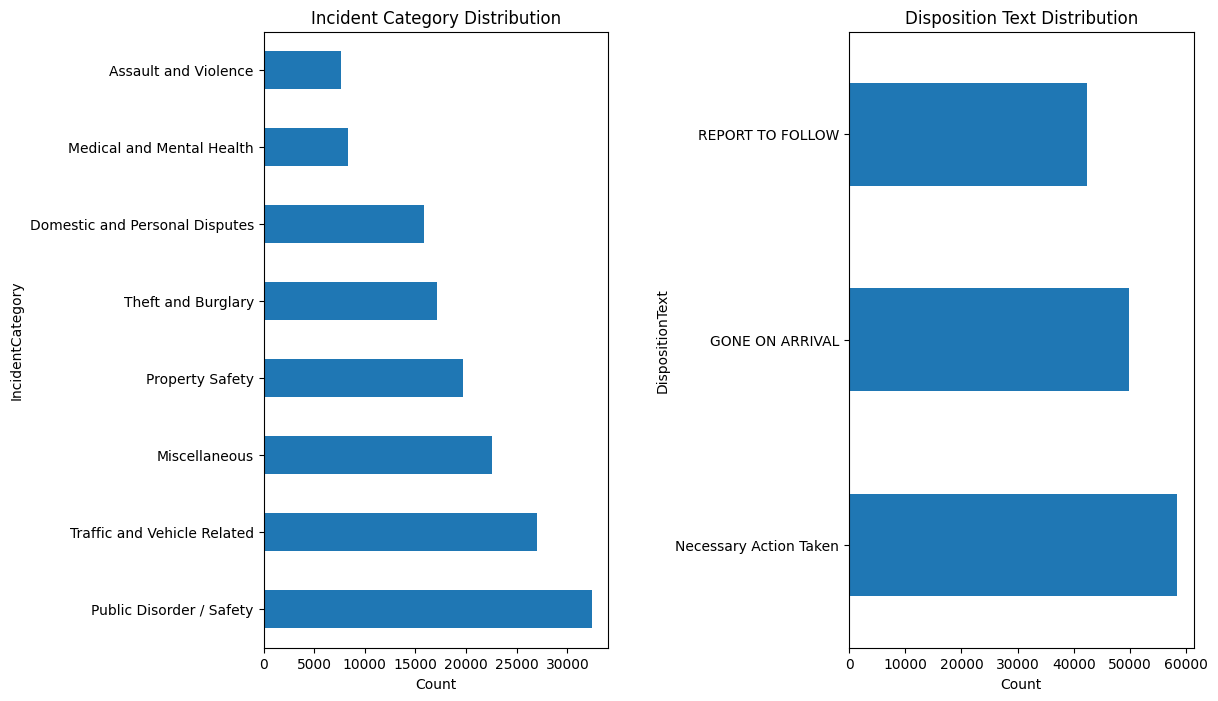

In [27]:
# Visualize Incident Category distribution and Disposition Text distribution. 
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.IncidentCategory.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a title.
ax[0].set_title('Incident Category Distribution')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.DispositionText.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a title.
ax[1].set_title('Disposition Text Distribution')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.7);


### 2c.2 Observe the class distribution of Zip Code and Police District.

In [30]:
## First, convert Zip Code to type object and drop null values. 

In [28]:
df = df.dropna(subset=['Zip'])

# Convert to integers to drop the decimal part
df['Zip'] = df['Zip'].astype(int)

# Convert to object type
df['Zip'] = df['Zip'].astype('object')

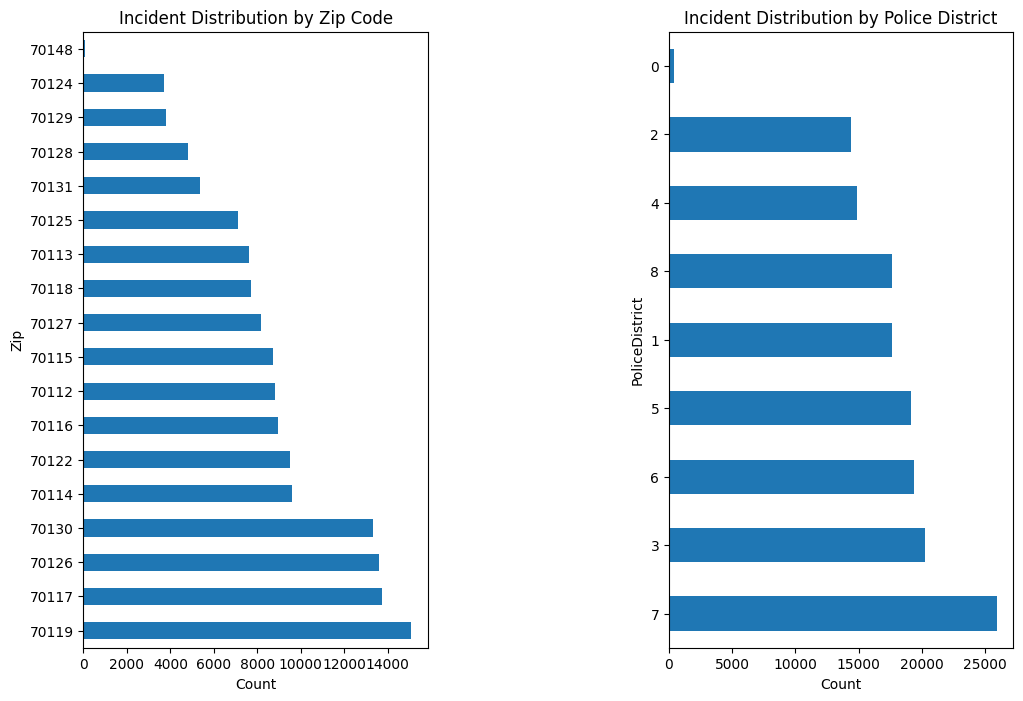

In [29]:
# Visualize Zip Code and Police District Distributions. 

#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))


#Zip Code
df.Zip.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a title.
ax[0].set_title('Incident Distribution by Zip Code')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')


# Police District
df.PoliceDistrict.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a title.
ax[1].set_title('Incident Distribution by Police District')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.7);

#### 2c.3 Further investigate the underrepresented zip code 70148.

In [30]:
# For zip code 70148, a negligible amount of records is revealed. Is this an entry error?
record_count = len(df[df['Zip'] == 70148])
print(record_count)

53


In [31]:
df = df[df['Zip'] != 70148]

This does not appear to be an error. However, the population of zip code 70148 is 264 and the area is 0.30 square miles. For future feature engineering purposes as it pertains to class balance, let's drop this zip code's records.
Source: https://www.zipdatamaps.com/70148

#### 2c.4 Further investigate Police District 0. This is an invalid Police District.

In [34]:
record_count2 = len(df[df['PoliceDistrict'] == 0])
print(record_count2)

374


In [35]:
# A police district "0" does not exist for New Orleans, so we will be dropping records with this classification value.
df = df[df['PoliceDistrict'] != 0]

In [37]:
# Observe the unique values in the "Type" column. This feature has low interpretability for the general public, but high interpretability for OPCD staff.
# Additionally, it is an important feature for dispatch triaging, and is therefore has parameter significance.
# We'll leave it for now.
df.Type.unique()

array(['SEXOFF', 'TRESP', 'WELFARE', 'THEFT', 'PRIS', 'DOMDIS', 'DESTR',
       'VEHSTO', 'DISORD', 'PROP', 'ACCH', 'BURGV', 'MENTAL', 'DOMVIO',
       'SUSPE', 'MISC', 'ALRMRB', 'ABVEH', 'ACCIHP', 'STFIRED', 'PSERVP',
       'INVP', 'VEHREC', 'PROTEST', 'ASLT', 'TRAFHZ', 'SUSPP', 'ACC',
       'ALRMCB', '21', 'NOISE', 'WEAPON', 'MURDERST', 'STALK', 'TRAF',
       'HOMEIV', 'ASLTWP', 'FIGHT', 'CIT', 'CRIMIS', '24', 'BURGR',
       'ROBCJ', 'THREAT', 'BURGC', 'DEADP', 'ROB', '103D', 'SUSPV',
       'FRAUD', 'URGENT', '95G', 'SUIT', 'PARTY', 'ACCIP', 'SHOTP',
       'TRAFDM', 'STABP', 'RAPE', 'PHONE', '56', 'DRUG', '29', 'ACCFX',
       'ABUSE', 'PROTECT', 'MURDER', 'FRWORK', 'DWI', 'ALRMRH', 'ACCIMP',
       'DIRECTP', 'UNK', 'ALRMCH', '35', 'TSNP', 'MISS', 'ROBW', 'DEADPU',
       'ABDUCT', 'WARRA', 'NOPD', '67C', 'VEHSTRC', 'ALRM', 'ALRMBB',
       'LOCKP', '67AR', '911', 'ODP', '94F', 'AREACK', 'BUSCK', 'CIVIL',
       '21P', '67A', 'SEXKIT', 'ACCIVP', '62B', '63', 'SUIAP', '43B',
  

### 2d. Data type Checkpoint
##### 2d.1 Convert Police District to an object, as it defines a categorical region, and is not used as an integer.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149289 entries, 0 to 325090
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Type              149289 non-null  object
 1   TypeText          149289 non-null  object
 2   Priority          149289 non-null  object
 3   InitialType       149289 non-null  object
 4   InitialTypeText   149289 non-null  object
 5   InitialPriority   149289 non-null  object
 6   TimeCreate        149289 non-null  object
 7   TimeDispatch      149289 non-null  object
 8   TimeArrive        130956 non-null  object
 9   TimeClosed        149289 non-null  object
 10  DispositionText   149287 non-null  object
 11  SelfInitiated     149289 non-null  object
 12  Beat              149276 non-null  object
 13  Zip               149289 non-null  object
 14  PoliceDistrict    149289 non-null  int64 
 15  Latitude          149289 non-null  object
 16  Longitude         149289 non-null  object
 

In [39]:
df["PoliceDistrict"]=df["PoliceDistrict"].astype(object)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149289 entries, 0 to 325090
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Type              149289 non-null  object
 1   TypeText          149289 non-null  object
 2   Priority          149289 non-null  object
 3   InitialType       149289 non-null  object
 4   InitialTypeText   149289 non-null  object
 5   InitialPriority   149289 non-null  object
 6   TimeCreate        149289 non-null  object
 7   TimeDispatch      149289 non-null  object
 8   TimeArrive        130956 non-null  object
 9   TimeClosed        149289 non-null  object
 10  DispositionText   149287 non-null  object
 11  SelfInitiated     149289 non-null  object
 12  Beat              149276 non-null  object
 13  Zip               149289 non-null  object
 14  PoliceDistrict    149289 non-null  object
 15  Latitude          149289 non-null  object
 16  Longitude         149289 non-null  object
 

##### 2d.2 Drop records where Lat/Long did not convert from the original "Location" column properly.

In the conversion of Location to two new Lat/Long columns, some invalid records were kept. Namely, those that retained the string "POINT".

In [46]:
values_to_drop_point = ['POINT']

In [47]:
df = df[~df['Latitude'].isin(values_to_drop_point)]

##### 3d. Convert 'TimeCreate', 'TimeDispatch', 'TimeArrive', and 'TimeClosed' to datetime values.

In [44]:
# format='%m/%d/%Y %I:%M:%S returns timestamp format, ie. 2023-01-06 17:02:01, which would indicate January 6th, 2023 at 5:02PM.
df['TimeCreate'] = pd.to_datetime(df['TimeCreate'], format='%m/%d/%Y %I:%M:%S %p')

In [45]:
df['TimeDispatch'] = pd.to_datetime(df['TimeDispatch'], format='%m/%d/%Y %I:%M:%S %p')

In [48]:
df['TimeArrive'] = pd.to_datetime(df['TimeArrive'], format='%m/%d/%Y %I:%M:%S %p')

In [49]:
df['TimeClosed'] = pd.to_datetime(df['TimeClosed'], format='%m/%d/%Y %I:%M:%S %p')

## 2e. Create four new columns that calculate four measures of response time:
### 2e.1 Dispatch Response Time = TimeDispatch - TimeCreate
### 2e.2 Scene Arrival Response Time = TimeArrive - TimeDispatch*
### 2e.3 Time Arrive to Time Closed = TimeClosed - TimeArrive
### 2e.4 Time Create to Arrival Time = TimeArrive - TimeCreate

* Initial target variable. From the perspective of the citizen calling 911, response time is measured from the time they call in to the time responders arrive. However, the intermediate step of dispatch triaging, occurs within that time frame.

#### 2e.1. Dispatch Response Time
Create a new column that calculates Dispatch Response Time: the time it took from record creation to the time officers were dispatched.

In [50]:
df['InitialCalltoDispatchTime'] = df['TimeDispatch'] - df['TimeCreate']

In [51]:
df.head()

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,Beat,Zip,PoliceDistrict,Latitude,Longitude,IncidentCategory,InitialCalltoDispatchTime
0,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,2023-01-06 16:55:53,2023-01-06 17:02:01,2023-01-06 18:28:28,2023-01-06 19:15:31,REPORT TO FOLLOW,N,2A02,70118,2,-90.12764112,29.91774739,Assault and Violence,0 days 00:06:08
1,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,2023-02-03 17:30:36,2023-02-03 18:09:35,2023-02-03 18:16:17,2023-02-03 18:27:44,GONE ON ARRIVAL,N,5C02,70117,5,-90.04784966,29.96876737,Property Safety,0 days 00:38:59
4,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,2023-02-03 20:21:39,2023-02-04 09:37:33,2023-02-05 04:31:36,2023-02-05 05:35:19,GONE ON ARRIVAL,N,7J04,70128,7,-89.95505013,30.02264209,Medical and Mental Health,0 days 13:15:54
5,THEFT,THEFT,1,THEFT,THEFT,0,2023-02-03 23:48:51,2023-02-05 09:01:59,2023-02-05 09:31:31,2023-02-05 09:36:10,GONE ON ARRIVAL,N,7O10,70127,7,-89.98826971,30.03428392,Theft and Burglary,1 days 09:13:08
6,PRIS,PRISONER TRANSPORT,1,PRIS,PRISONER TRANSPORT,1,2023-01-07 06:08:31,2023-01-08 01:02:30,2023-01-08 01:23:23,2023-01-08 02:56:18,Necessary Action Taken,N,4H02,70114,4,-90.03189701,29.94972492,Miscellaneous,0 days 18:53:59


#### 2e.2 Scene Arrival Response Time
Create a new column with Dispatch to Arrival time calculation.

In [52]:
df['DispatchToArriveTime'] = df['TimeArrive'] - df['TimeDispatch']

In [53]:
df.head()

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,Beat,Zip,PoliceDistrict,Latitude,Longitude,IncidentCategory,InitialCalltoDispatchTime,DispatchToArriveTime
0,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,2023-01-06 16:55:53,2023-01-06 17:02:01,2023-01-06 18:28:28,2023-01-06 19:15:31,REPORT TO FOLLOW,N,2A02,70118,2,-90.12764112,29.91774739,Assault and Violence,0 days 00:06:08,0 days 01:26:27
1,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,2023-02-03 17:30:36,2023-02-03 18:09:35,2023-02-03 18:16:17,2023-02-03 18:27:44,GONE ON ARRIVAL,N,5C02,70117,5,-90.04784966,29.96876737,Property Safety,0 days 00:38:59,0 days 00:06:42
4,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,2023-02-03 20:21:39,2023-02-04 09:37:33,2023-02-05 04:31:36,2023-02-05 05:35:19,GONE ON ARRIVAL,N,7J04,70128,7,-89.95505013,30.02264209,Medical and Mental Health,0 days 13:15:54,0 days 18:54:03
5,THEFT,THEFT,1,THEFT,THEFT,0,2023-02-03 23:48:51,2023-02-05 09:01:59,2023-02-05 09:31:31,2023-02-05 09:36:10,GONE ON ARRIVAL,N,7O10,70127,7,-89.98826971,30.03428392,Theft and Burglary,1 days 09:13:08,0 days 00:29:32
6,PRIS,PRISONER TRANSPORT,1,PRIS,PRISONER TRANSPORT,1,2023-01-07 06:08:31,2023-01-08 01:02:30,2023-01-08 01:23:23,2023-01-08 02:56:18,Necessary Action Taken,N,4H02,70114,4,-90.03189701,29.94972492,Miscellaneous,0 days 18:53:59,0 days 00:20:53


#### 2e.3. Time Arrive to Time Closed
Create a column calculation that measures the time between NOPD arrival and when the incident was logged as "closed."

In [54]:
df['ArrivaltoClose'] = df['TimeClosed'] - df['TimeArrive']

#### 2e.4 Call time to Time Arrive

In [55]:
df['ActualResponseTime'] = df['TimeArrive'] - df['TimeCreate']

In [56]:
# Confirm that the four new measure columns were created.
df.head()

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,...,Beat,Zip,PoliceDistrict,Latitude,Longitude,IncidentCategory,InitialCalltoDispatchTime,DispatchToArriveTime,ArrivaltoClose,ActualResponseTime
0,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,2023-01-06 16:55:53,2023-01-06 17:02:01,2023-01-06 18:28:28,2023-01-06 19:15:31,...,2A02,70118,2,-90.12764112,29.91774739,Assault and Violence,0 days 00:06:08,0 days 01:26:27,0 days 00:47:03,0 days 01:32:35
1,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,2023-02-03 17:30:36,2023-02-03 18:09:35,2023-02-03 18:16:17,2023-02-03 18:27:44,...,5C02,70117,5,-90.04784966,29.96876737,Property Safety,0 days 00:38:59,0 days 00:06:42,0 days 00:11:27,0 days 00:45:41
4,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,2023-02-03 20:21:39,2023-02-04 09:37:33,2023-02-05 04:31:36,2023-02-05 05:35:19,...,7J04,70128,7,-89.95505013,30.02264209,Medical and Mental Health,0 days 13:15:54,0 days 18:54:03,0 days 01:03:43,1 days 08:09:57
5,THEFT,THEFT,1,THEFT,THEFT,0,2023-02-03 23:48:51,2023-02-05 09:01:59,2023-02-05 09:31:31,2023-02-05 09:36:10,...,7O10,70127,7,-89.98826971,30.03428392,Theft and Burglary,1 days 09:13:08,0 days 00:29:32,0 days 00:04:39,1 days 09:42:40
6,PRIS,PRISONER TRANSPORT,1,PRIS,PRISONER TRANSPORT,1,2023-01-07 06:08:31,2023-01-08 01:02:30,2023-01-08 01:23:23,2023-01-08 02:56:18,...,4H02,70114,4,-90.03189701,29.94972492,Miscellaneous,0 days 18:53:59,0 days 00:20:53,0 days 01:32:55,0 days 19:14:52


#### 2f. Convert new time difference columns to float values in hour units.

In [57]:
#### 4e.1 Initial Call to Dispatch Time
df['InitialCalltoDispatchTime'] = df['InitialCalltoDispatchTime'].dt.total_seconds() / 3600

In [58]:
# Drop negative values.
df = df[df['InitialCalltoDispatchTime'] >= 0]

In [59]:
df.head()

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,...,Beat,Zip,PoliceDistrict,Latitude,Longitude,IncidentCategory,InitialCalltoDispatchTime,DispatchToArriveTime,ArrivaltoClose,ActualResponseTime
0,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,2023-01-06 16:55:53,2023-01-06 17:02:01,2023-01-06 18:28:28,2023-01-06 19:15:31,...,2A02,70118,2,-90.12764112,29.91774739,Assault and Violence,0.102222,0 days 01:26:27,0 days 00:47:03,0 days 01:32:35
1,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,2023-02-03 17:30:36,2023-02-03 18:09:35,2023-02-03 18:16:17,2023-02-03 18:27:44,...,5C02,70117,5,-90.04784966,29.96876737,Property Safety,0.649722,0 days 00:06:42,0 days 00:11:27,0 days 00:45:41
4,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,2023-02-03 20:21:39,2023-02-04 09:37:33,2023-02-05 04:31:36,2023-02-05 05:35:19,...,7J04,70128,7,-89.95505013,30.02264209,Medical and Mental Health,13.265000,0 days 18:54:03,0 days 01:03:43,1 days 08:09:57
5,THEFT,THEFT,1,THEFT,THEFT,0,2023-02-03 23:48:51,2023-02-05 09:01:59,2023-02-05 09:31:31,2023-02-05 09:36:10,...,7O10,70127,7,-89.98826971,30.03428392,Theft and Burglary,33.218889,0 days 00:29:32,0 days 00:04:39,1 days 09:42:40
6,PRIS,PRISONER TRANSPORT,1,PRIS,PRISONER TRANSPORT,1,2023-01-07 06:08:31,2023-01-08 01:02:30,2023-01-08 01:23:23,2023-01-08 02:56:18,...,4H02,70114,4,-90.03189701,29.94972492,Miscellaneous,18.899722,0 days 00:20:53,0 days 01:32:55,0 days 19:14:52


In [60]:
df['DispatchToArriveTime'] = df['DispatchToArriveTime'].dt.total_seconds() / 3600

In [61]:
# Drop negative values.
df = df[df['DispatchToArriveTime'] >= 0]

In [62]:
df.head()

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,...,Beat,Zip,PoliceDistrict,Latitude,Longitude,IncidentCategory,InitialCalltoDispatchTime,DispatchToArriveTime,ArrivaltoClose,ActualResponseTime
0,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,2023-01-06 16:55:53,2023-01-06 17:02:01,2023-01-06 18:28:28,2023-01-06 19:15:31,...,2A02,70118,2,-90.12764112,29.91774739,Assault and Violence,0.102222,1.440833,0 days 00:47:03,0 days 01:32:35
1,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,2023-02-03 17:30:36,2023-02-03 18:09:35,2023-02-03 18:16:17,2023-02-03 18:27:44,...,5C02,70117,5,-90.04784966,29.96876737,Property Safety,0.649722,0.111667,0 days 00:11:27,0 days 00:45:41
4,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,2023-02-03 20:21:39,2023-02-04 09:37:33,2023-02-05 04:31:36,2023-02-05 05:35:19,...,7J04,70128,7,-89.95505013,30.02264209,Medical and Mental Health,13.265000,18.900833,0 days 01:03:43,1 days 08:09:57
5,THEFT,THEFT,1,THEFT,THEFT,0,2023-02-03 23:48:51,2023-02-05 09:01:59,2023-02-05 09:31:31,2023-02-05 09:36:10,...,7O10,70127,7,-89.98826971,30.03428392,Theft and Burglary,33.218889,0.492222,0 days 00:04:39,1 days 09:42:40
6,PRIS,PRISONER TRANSPORT,1,PRIS,PRISONER TRANSPORT,1,2023-01-07 06:08:31,2023-01-08 01:02:30,2023-01-08 01:23:23,2023-01-08 02:56:18,...,4H02,70114,4,-90.03189701,29.94972492,Miscellaneous,18.899722,0.348056,0 days 01:32:55,0 days 19:14:52


In [63]:
df['ArrivaltoClose'] = df['ArrivaltoClose'].dt.total_seconds() / 3600

In [64]:
# Drop negative values.
df = df[df['ArrivaltoClose'] >= 0]

In [65]:
df.head()

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,...,Beat,Zip,PoliceDistrict,Latitude,Longitude,IncidentCategory,InitialCalltoDispatchTime,DispatchToArriveTime,ArrivaltoClose,ActualResponseTime
0,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,2023-01-06 16:55:53,2023-01-06 17:02:01,2023-01-06 18:28:28,2023-01-06 19:15:31,...,2A02,70118,2,-90.12764112,29.91774739,Assault and Violence,0.102222,1.440833,0.784167,0 days 01:32:35
1,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,2023-02-03 17:30:36,2023-02-03 18:09:35,2023-02-03 18:16:17,2023-02-03 18:27:44,...,5C02,70117,5,-90.04784966,29.96876737,Property Safety,0.649722,0.111667,0.190833,0 days 00:45:41
4,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,2023-02-03 20:21:39,2023-02-04 09:37:33,2023-02-05 04:31:36,2023-02-05 05:35:19,...,7J04,70128,7,-89.95505013,30.02264209,Medical and Mental Health,13.265000,18.900833,1.061944,1 days 08:09:57
5,THEFT,THEFT,1,THEFT,THEFT,0,2023-02-03 23:48:51,2023-02-05 09:01:59,2023-02-05 09:31:31,2023-02-05 09:36:10,...,7O10,70127,7,-89.98826971,30.03428392,Theft and Burglary,33.218889,0.492222,0.077500,1 days 09:42:40
6,PRIS,PRISONER TRANSPORT,1,PRIS,PRISONER TRANSPORT,1,2023-01-07 06:08:31,2023-01-08 01:02:30,2023-01-08 01:23:23,2023-01-08 02:56:18,...,4H02,70114,4,-90.03189701,29.94972492,Miscellaneous,18.899722,0.348056,1.548611,0 days 19:14:52


In [66]:
df['ActualResponseTime'] = df['ActualResponseTime'].dt.total_seconds() / 3600

In [67]:
# Drop negative values.
df = df[df['ActualResponseTime'] >= 0]

In [68]:
df.describe()

,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,InitialCalltoDispatchTime,DispatchToArriveTime,ArrivaltoClose,ActualResponseTime
count,125360,125360,125360,125360,125360.000000,125360.000000,125360.000000,125360.000000
mean,2023-06-22 14:15:32.921314560,2023-06-22 16:20:50.081708544,2023-06-22 16:37:18.821330176,2023-06-22 17:44:48.432067072,2.088100,0.274650,1.124892,2.362750
min,2023-01-01 00:01:27,2023-01-01 00:10:01,2023-01-01 00:29:49,2023-01-01 00:38:50,0.000000,0.000278,0.000278,0.000556
25%,2023-03-23 07:40:04.249999872,2023-03-23 08:50:09.500000,2023-03-23 08:58:22.249999872,2023-03-23 10:22:30.500000,0.041389,0.061944,0.210000,0.176111
50%,2023-06-15 12:44:32,2023-06-15 14:26:57.500000,2023-06-15 14:45:00.500000,2023-06-15 15:51:02,0.355000,0.117500,0.613611,0.561944
75%,2023-09-21 09:11:26.750000128,2023-09-21 10:20:15.750000128,2023-09-21 10:32:01.500000,2023-09-21 12:17:41.500000,2.070347,0.201389,1.400278,2.401667
max,2023-12-31 23:50:52,2024-01-01 01:31:08,2024-01-01 01:41:18,2024-01-01 02:39:32,108.229444,86.536944,695.441389,133.283889
std,NaN,NaN,NaN,NaN,4.382705,1.182769,3.395053,4.626214


## 3a. Observe the spread of calculated response time measures. 

#### 3a.1 Create a histogram of the 75th percentile of Initial Call to Dispatch Time. 

0.355


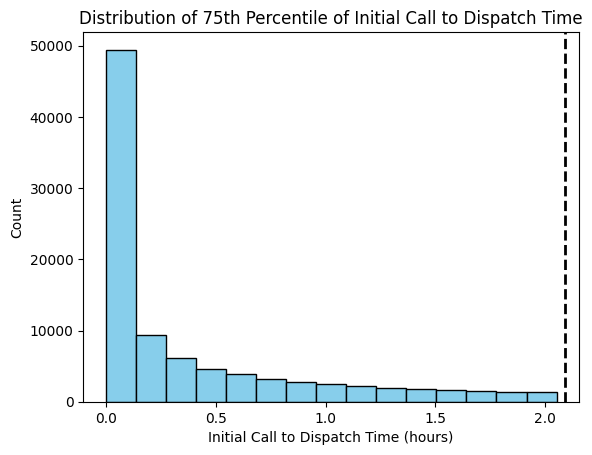

In [69]:

# Plot distribution of Initial Call to Dispatch Time
filtered_values_1 = df[df['InitialCalltoDispatchTime'] < 2.051944]['InitialCalltoDispatchTime']
plt.hist(filtered_values_1, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Initial Call to Dispatch Time (hours)')
plt.ylabel('Count')
plt.title('Distribution of 75th Percentile of Initial Call to Dispatch Time');
# Add a reference line of the mean.
initialcalltodispatch_mean = df['InitialCalltoDispatchTime'].mean()
plt.axvline(x=initialcalltodispatch_mean, color='black', linestyle='--', linewidth=2)


*** TO BE EDITED ***

While Dispatch to Arrival Time seems normally distributed and within acceptable range (75th percentile under 30 minutes), the skewness of initial call to arrival time is highly skewed and therefore affects my initial target variable, "Actual Response Time," which measures the time from a citizen's call to emergency responder arrival. From this observation, it can be deduced that the responsible factor for delayed arrival time is within OPCD's triaging system. 

#### 3a.2 Create a histogram of the 75th percentile of Dispatch Time to Arrival Time. 

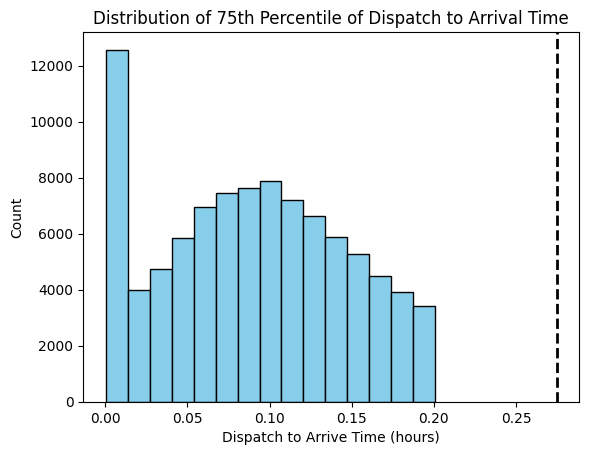

In [70]:
# Plot distribution of the 75th Percentile of Dispatch to Arrive Time
filtered_values_2 = df[df['DispatchToArriveTime'] < 0.201111]['DispatchToArriveTime']
plt.hist(filtered_values_2, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Dispatch to Arrive Time (hours)')
plt.ylabel('Count')
plt.title('Distribution of 75th Percentile of Dispatch to Arrival Time');
# Add a reference line of the mean.
dispatchtoarrive_mean = df['DispatchToArriveTime'].mean()
plt.axvline(x=dispatchtoarrive_mean, color='black', linestyle='--', linewidth=2)

#### 3a.3 Create a histogram of the 75th percentile of Arrival to Close Time.

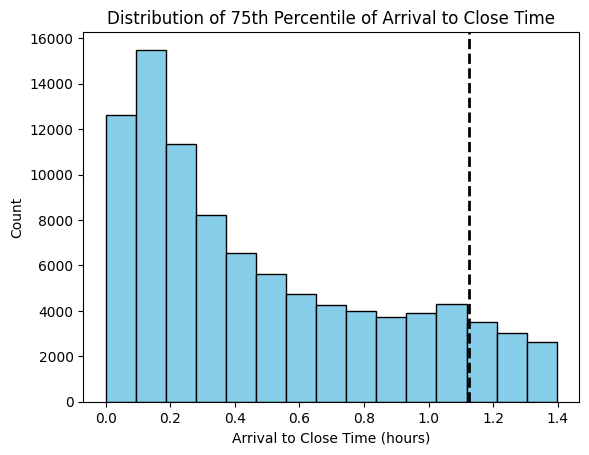

In [71]:
# Plot distribution of Arrival to Close Time
filtered_values_3 = df[df['ArrivaltoClose'] < 1.396667]['ArrivaltoClose']
plt.hist(filtered_values_3, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Arrival to Close Time (hours)')
plt.ylabel('Count')
plt.title('Distribution of 75th Percentile of Arrival to Close Time');
# Add a reference line of the mean.
arrivaltoclose_mean = df['ArrivaltoClose'].mean()
plt.axvline(x=arrivaltoclose_mean, color='black', linestyle='--', linewidth=2)

#### 3a.4 Create a histogram of the 75th percentile of Perceived Response Time. 

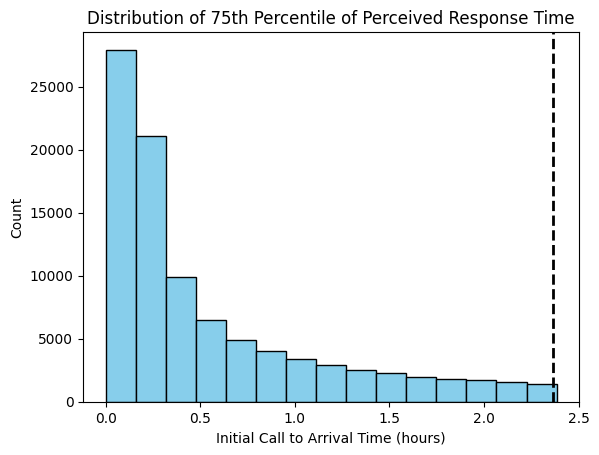

In [72]:
# Plot distribution of Initial Call to Dispatch Time
filtered_values_4 = df[df['ActualResponseTime'] < 2.383333]['ActualResponseTime']
plt.hist(filtered_values_4, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Initial Call to Arrival Time (hours)')
plt.ylabel('Count')
plt.title('Distribution of 75th Percentile of Perceived Response Time');
# Add a reference line of the mean.
initialcalltoarrive_mean = df['ActualResponseTime'].mean()
plt.axvline(x=initialcalltoarrive_mean, color='black', linestyle='--', linewidth=2)


In [73]:
print(initialcalltoarrive_mean)
initialcalltoarrive_median = df['ActualResponseTime'].median()
print(initialcalltoarrive_median)

2.3627500044316814
0.5619444444444445


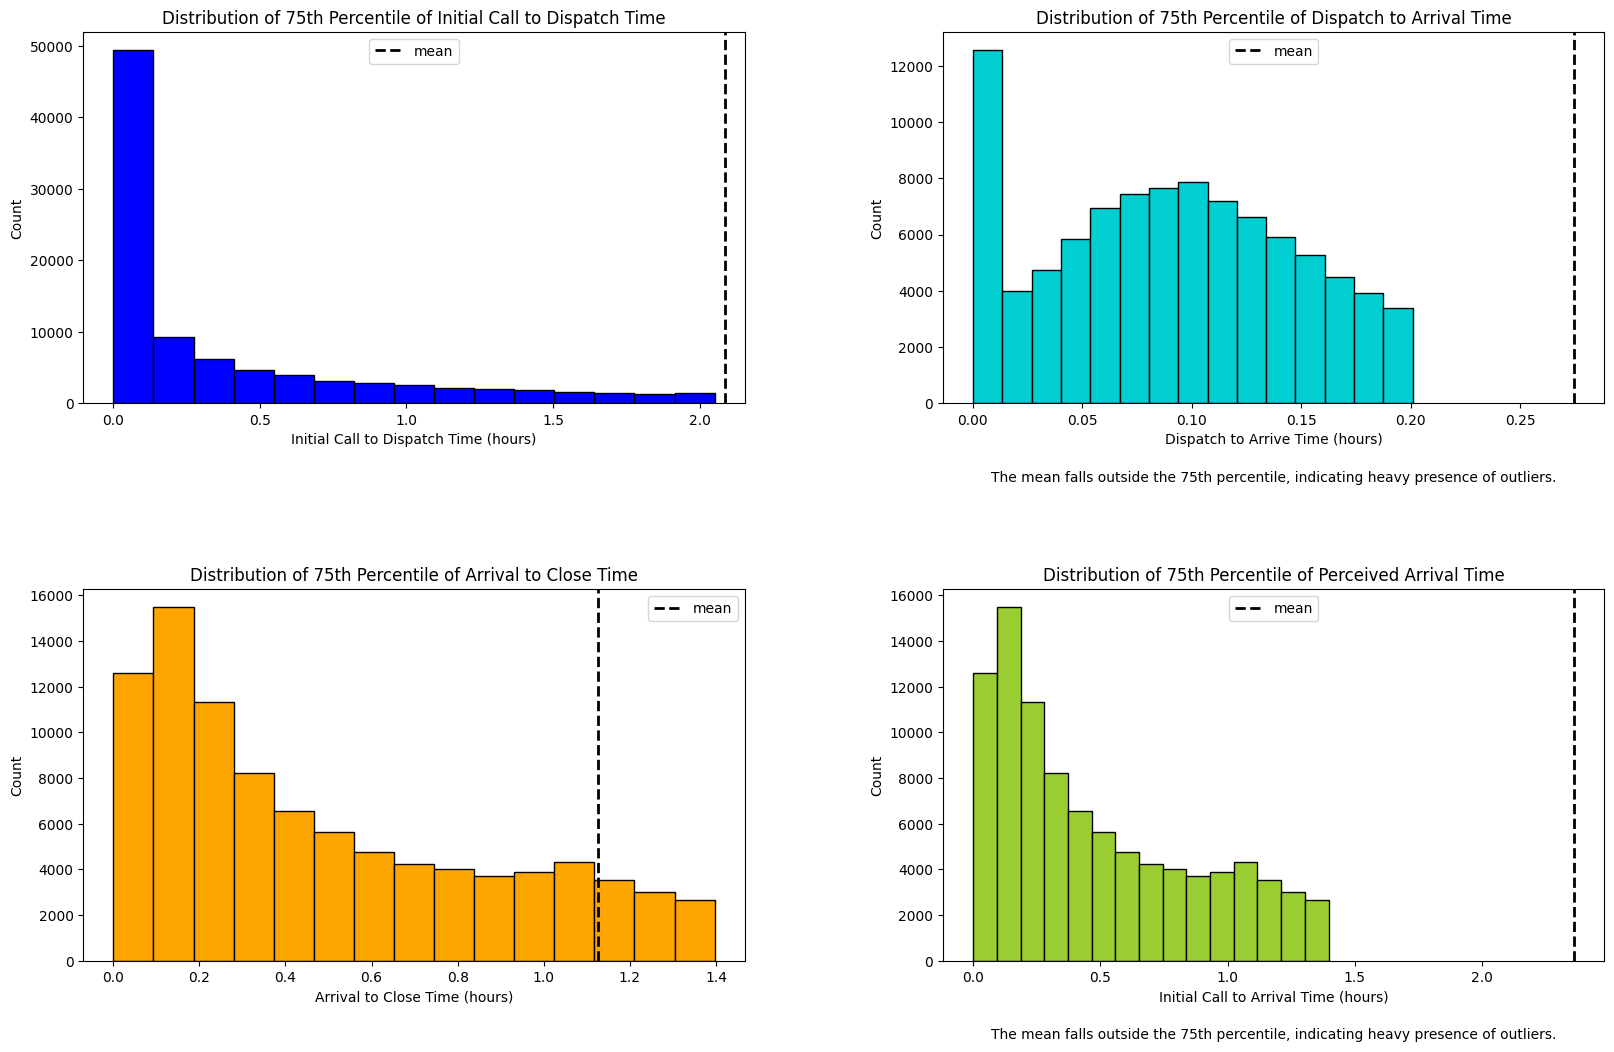

In [74]:
# Combined into subplots.
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Subplot 1: Histogram of 75th Percentile of Initial Call to Dispatch Time
ax1 = axs[0, 0]
ax1.hist(filtered_values_1, bins=15, color='blue', edgecolor='black')
ax1.set_xlabel('Initial Call to Dispatch Time (hours)')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of 75th Percentile of Initial Call to Dispatch Time')
ax1.axvline(x=initialcalltodispatch_mean, color='black', linestyle='--', linewidth=2, label='mean')
ax1.legend()

# Subplot 2: Histogram of 75th Percentile of Dispatch to Arrive Time
ax2 = axs[0, 1]
ax2.hist(filtered_values_2, bins=15, color='darkturquoise', edgecolor='black')
ax2.set_xlabel('Dispatch to Arrive Time (hours)')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of 75th Percentile of Dispatch to Arrival Time')
ax2.axvline(x=dispatchtoarrive_mean, color='black', linestyle='--', linewidth=2, label='mean')
ax2.legend()

# Subplot 3: Histogram of 75th Percentile of Arrival to Close Time
ax3 = axs[1, 0]
ax3.hist(filtered_values_3, bins=15, color='orange', edgecolor='black')
ax3.set_xlabel('Arrival to Close Time (hours)')
ax3.set_ylabel('Count')
ax3.set_title('Distribution of 75th Percentile of Arrival to Close Time')
ax3.axvline(x=arrivaltoclose_mean, color='black', linestyle='--', linewidth=2, label='mean')
ax3.legend()

# Subplot 4: Histogram of 75th Percentile of Perceived Arrival Time
ax4 = axs[1, 1]
ax4.hist(filtered_values_3, bins=15, color='yellowgreen', edgecolor='black')  # Example, use the correct filtered data
ax4.set_xlabel('Initial Call to Arrival Time (hours)')
ax4.set_ylabel('Count')
ax4.set_title('Distribution of 75th Percentile of Perceived Arrival Time')
ax4.axvline(x=initialcalltoarrive_mean, color='black', linestyle='--', linewidth=2, label='mean')
ax4.legend()

# Adjust layout
fig.tight_layout(pad=0.2)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Add text to specific subplots
ax2.text(0.5, -0.2, 'The mean falls outside the 75th percentile, indicating heavy presence of outliers.', ha='center', va='center', transform=ax2.transAxes)
ax4.text(0.5, -0.2, 'The mean falls outside the 75th percentile, indicating heavy presence of outliers.', ha='center', va='center', transform=ax4.transAxes)

# Show plot
plt.show()

In [75]:
# Final datatype check. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125360 entries, 0 to 325090
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Type                       125360 non-null  object        
 1   TypeText                   125360 non-null  object        
 2   Priority                   125360 non-null  object        
 3   InitialType                125360 non-null  object        
 4   InitialTypeText            125360 non-null  object        
 5   InitialPriority            125360 non-null  object        
 6   TimeCreate                 125360 non-null  datetime64[ns]
 7   TimeDispatch               125360 non-null  datetime64[ns]
 8   TimeArrive                 125360 non-null  datetime64[ns]
 9   TimeClosed                 125360 non-null  datetime64[ns]
 10  DispositionText            125358 non-null  object        
 11  SelfInitiated              125360 non-null  object       

In [76]:
df.head()

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,...,Beat,Zip,PoliceDistrict,Latitude,Longitude,IncidentCategory,InitialCalltoDispatchTime,DispatchToArriveTime,ArrivaltoClose,ActualResponseTime
0,SEXOFF,SEX OFFENSE: GENERAL/MISC,2,ASLT,SIMPLE ASSAULT,1,2023-01-06 16:55:53,2023-01-06 17:02:01,2023-01-06 18:28:28,2023-01-06 19:15:31,...,2A02,70118,2,-90.12764112,29.91774739,Assault and Violence,0.102222,1.440833,0.784167,1.543056
1,TRESP,TRESPASSING,2,TRESP,TRESPASSING,2,2023-02-03 17:30:36,2023-02-03 18:09:35,2023-02-03 18:16:17,2023-02-03 18:27:44,...,5C02,70117,5,-90.04784966,29.96876737,Property Safety,0.649722,0.111667,0.190833,0.761389
4,WELFARE,WELFARE CHECK,1,WELFARE,WELFARE CHECK,1,2023-02-03 20:21:39,2023-02-04 09:37:33,2023-02-05 04:31:36,2023-02-05 05:35:19,...,7J04,70128,7,-89.95505013,30.02264209,Medical and Mental Health,13.265000,18.900833,1.061944,32.165833
5,THEFT,THEFT,1,THEFT,THEFT,0,2023-02-03 23:48:51,2023-02-05 09:01:59,2023-02-05 09:31:31,2023-02-05 09:36:10,...,7O10,70127,7,-89.98826971,30.03428392,Theft and Burglary,33.218889,0.492222,0.077500,33.711111
6,PRIS,PRISONER TRANSPORT,1,PRIS,PRISONER TRANSPORT,1,2023-01-07 06:08:31,2023-01-08 01:02:30,2023-01-08 01:23:23,2023-01-08 02:56:18,...,4H02,70114,4,-90.03189701,29.94972492,Miscellaneous,18.899722,0.348056,1.548611,19.247778


In [77]:
# Final dimensions for evaluation.
df.columns

Index(['Type', 'TypeText', 'Priority', 'InitialType', 'InitialTypeText',
       'InitialPriority', 'TimeCreate', 'TimeDispatch', 'TimeArrive',
       'TimeClosed', 'DispositionText', 'SelfInitiated', 'Beat', 'Zip',
       'PoliceDistrict', 'Latitude', 'Longitude', 'IncidentCategory',
       'InitialCalltoDispatchTime', 'DispatchToArriveTime', 'ArrivaltoClose',
       'ActualResponseTime'],
      dtype='object')

In [78]:
df.to_csv("CapstoneDataCleaned.csv", index=False)